# Statistical Insights into Causes of Climate Change using MLR and Regularisation
#### Chi Tai Nguyen - 3444339 - STAT2020 Project

## Abstract

As generations pass, humans develop to the detriment of their surrounding habitat. Climate change, among many others, stands as the utmost concern for environmentalists and has prompted many global organisations and committees to seek ways to protect our planet.

The primary objective of this report is to offer insights into the significant causes of climate change, revealed through statistical methods and models. Inferences will be drawn from analysing anthropogenic data collected by the World Bank, in affiliation with regional institutions.

The mentioned data is an agglomeration of many indicators related to climate change, grouped by country or territory. Findings were drawn from investigating notable categories with different degrees of correlation to greenhouse gas emissions.  Some of these categories pertain to agricultural and natural land area, urban populations, energy use and resource depletion. Relationships between target and predictors were analysed with Multiple Linear Regression and Regularisation (Ridge and Lasso Regressions).

During investigation, I have discovered a few highly correlated indicators, as well as the influence of each on total greenhouse gas emissions. Energy use, agricultural development and deforestations were proven to represent the distribution of greenhouse gas emissions to high degrees.

Ultimately, this report hopes to offer insight into which human-originated activities are contributing to the production of greenhouse gases which harm the Earth’s atmospheres and ecosystems.


## Introduction

Greenhouse gas (GHG) accumulation in the atmosphere is a major culprit of global warming and climate instability. GHG emissions can stem from various human activities including but not limited to industries, transportation, agriculture, and deforestation, which are recorded in detailed metrics. It is crucial to identify the sources of emissions and their impact if we were to devise mitigation strategies that can be applied regionally and globally.

As a way of studying climate change, this report aims to point out and analyse key categories that correlate with total GHG emissions. The motive behind this approach is that categories with a high correlation to GHG emissions are likely significant indicators of environmental harm.
By examining the categories with the highest correlation to total GHG emissions, we can uncover the main causes of emissions and study their impact.
In short, this report prioritises investigating certain metrics of human activities that are most likely to contribute to GHG emissions and provide personal thoughts on the side.


## Data

Python libraries and modules used in this project:

In [206]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

The report uses data collected by the World Bank and affliates, compiled into a CSV file named **wbcc_bc.csv**. This dataset contains 77 indicators of various human activities related to climate change, pertainining to 217 countries and regions.
To preprocess this data, we will rename the indicator columns to avoid syntax conflicts when used with some data analysis modules.

In [207]:
df = pd.read_csv("wbcc_bc.csv")

# Renaming columns to avoid syntax conflicts
old_names = df.columns
new_names = [name.replace(".", "_") for name in old_names]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

# Display DataFrame
df

,iso3c,country,AG_LND_AGRI_K2,AG_LND_AGRI_ZS,AG_LND_ARBL_ZS,AG_LND_EL5M_RU_K2,AG_LND_EL5M_RU_ZS,AG_LND_EL5M_UR_K2,AG_LND_EL5M_UR_ZS,AG_LND_EL5M_ZS,...,SE_PRM_CMPT_ZS,SH_DYN_MORT,SH_MED_CMHW_P3,SH_STA_MALN_ZS,SI_POV_DDAY,SP_POP_GROW,SP_POP_TOTL,SP_URB_GROW,SP_URB_TOTL,SP_URB_TOTL_IN_ZS
0,ABW,Aruba,20.00,11.111111,11.111111,4.278099,2.352464,8.579794,4.717904,7.070368,...,101.180557,NaN,NaN,NaN,NaN,0.428017,106766,0.774631,46654.0,43.697
1,AFG,Afghanistan,379190.00,58.081365,11.798854,NaN,NaN,NaN,NaN,NaN,...,85.625328,60.3,NaN,19.1,NaN,2.303812,38928341,3.354421,10131490.0,26.026
2,AGO,Angola,569524.90,45.682594,3.930376,1516.944458,0.121392,54.130676,0.004332,0.125724,...,46.187149,74.7,NaN,19.0,49.9,3.218530,32866268,4.192962,21962884.0,66.825
3,ALB,Albania,11740.81,42.849672,22.311898,1294.595459,4.562272,84.844978,0.299001,4.861273,...,103.322746,9.7,NaN,1.5,1.3,-0.577942,2837743,0.853866,1762579.0,62.112
4,AND,Andorra,188.30,40.063830,1.765957,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,0.154134,77265,0.076581,67928.0,87.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,Kosovo,5700.00,52.356021,27.555800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4,-0.757525,1775378,NaN,NaN,NaN
213,YEM,"Yemen, Rep.",233877.00,44.297403,2.079095,1597.811768,0.384098,125.922813,0.030271,0.414368,...,72.300392,58.4,0.001,39.9,18.3,2.251561,29825968,3.940860,11306428.0,37.908
214,ZAF,South Africa,963410.00,79.417850,9.892094,674.114441,0.055407,151.516586,0.012454,0.067861,...,90.344498,34.5,0.192,5.5,18.7,1.273356,59308690,2.015480,39946775.0,67.354
215,ZMB,Zambia,238360.00,32.063923,5.111718,NaN,NaN,NaN,NaN,NaN,...,79.973877,61.7,0.287,11.8,58.7,2.885686,18383956,4.141609,8204576.0,44.629


## Methods

Among all of the statistical methods mentioned in the STAT2020 course, the 2 methods chosen in this analysis are Linear Regression (including Simple Linear Regression and Multiple Linear Regression) and Regularisation (including Ridge Regression and Lasso Regression)


### Processing the Data

From observing the dataset, surely there is an abundance of information to sift through. Our primary goal here is to select a response variable and some significant predictors among the numerous categories.

After examining the indicators' descriptions, I have narrowed possible dependent variables down to one: *EN.ATM.GHGT.KT.CE* (or *EN_ATM_GHGT_KT_CE* in my rendition of the data). This column displays the kilotons carbon dioxide (CO2) equivalent of total greenhouse gas emissions, and is an aggregate sum of various emissions categories (CO2, N2O, methane, HFCs, PFCs and SF6). *EN.ATM.GHGT.KT.CE* is preferred over other categories since its data is more readily available (191/217 non-nulls)


In [208]:
target_column = 'EN_ATM_GHGT_KT_CE'
df[target_column].info()

<class 'pandas.core.series.Series'>
RangeIndex: 217 entries, 0 to 216
Series name: EN_ATM_GHGT_KT_CE
Non-Null Count  Dtype  
--------------  -----  
191 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


Now that we have chosen an appropriate response variable, *EN.ATM.GHGT.KT.CE*, we will move on to selecting predictors with significant power. These predictors can be found by plotting their correlation with our response variable:

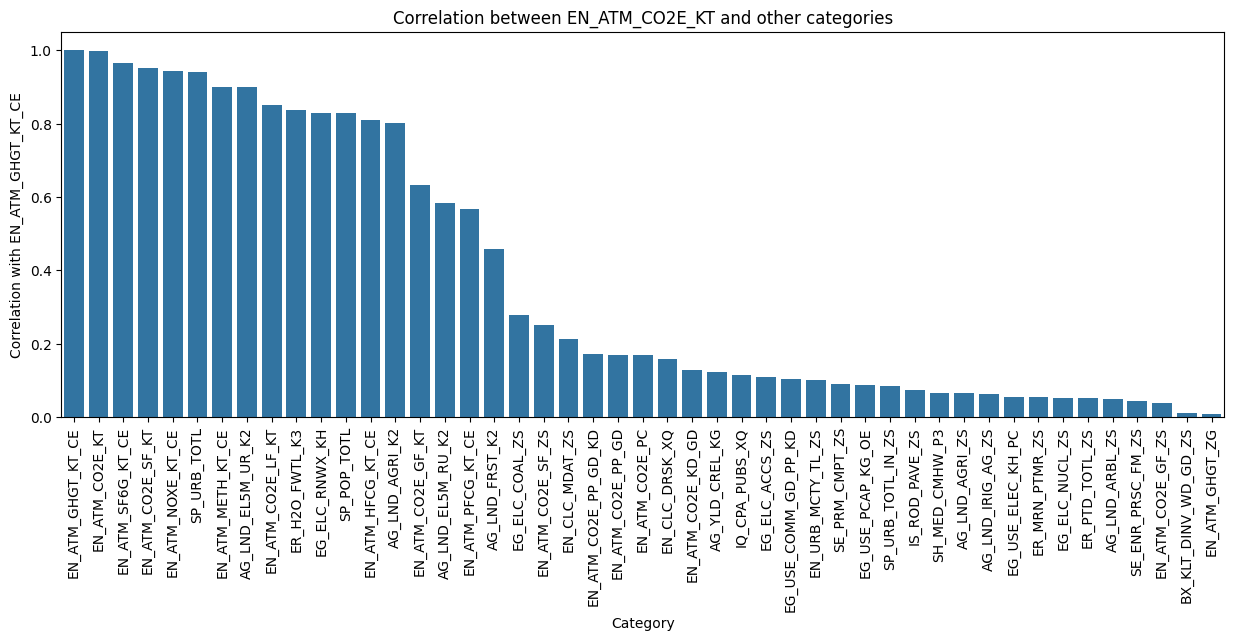

In [209]:
# Drop rows where EN_ATM_GHGT_KT_CE is null
df = df.dropna(subset=[target_column])

# Generate a correlation Series and sort it
correlations = df[df.columns[2:]].corr()[target_column][:]
correlations_sorted = pd.DataFrame(correlations[correlations > 0].sort_values(ascending=False))

# Renaming labels
correlations_sorted.rename(columns={'Unnamed: 0': 'Category', target_column: f'Correlation with {target_column}'}, inplace=True)
correlations_sorted.index.names = ['Category']

# Display correlation plot
plt.figure(figsize=(15, 5)) 
sns.barplot(x=correlations_sorted.index, y=correlations_sorted[f'Correlation with {target_column}']) 
plt.xticks(rotation=90)
plt.title("Correlation between EN_ATM_CO2E_KT and other categories")
plt.show()

Note that the plot only shows categories that have a positve correlation (> 0.0) with *EN.ATM.GHGT.KT.CE*. We will limit our scope to a few notable, listed below. These categories were chosen based on their high correlation (over 0.2) with our response variable and purpose as a cause for Climate Change. While many EN categories indeed have over 0.70 correlation with *EN.ATM.GHGT.KT.CE*, they do not qualify since the response already encompasses their data. Some other highly correlated categories are reasonably not considered **causes** of climate change.

In [210]:
# Read the indicator glossary data
glossary = pd.read_csv("wbindcc.csv")

# Selecting significant categories
target_indices = [41, 75, 3, 21, 0, 26, 8]
raw_target_categories = glossary.iloc[target_indices]["indicator_id"].to_list()
target_categories = [name.replace(".", "_") for name in raw_target_categories]

# Display the categories
glossary.iloc[target_indices]

,indicator_id,indicator,indicator_desc
41,EN.ATM.GHGT.KT.CE,Total greenhouse gas emissions (kt of CO2 equi...,Total greenhouse gas emissions in kt of CO2 eq...
75,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...
3,AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,Rural land area below 5m is the total rural la...
21,EG.ELC.RNWX.KH,"Electricity production from renewable sources,...","Electricity production from renewable sources,..."
0,AG.LND.AGRI.K2,Agricultural land (sq. km),Agricultural land refers to the share of land ...
26,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
8,AG.LND.FRST.K2,Forest area (sq. km),Forest area is land under natural or planted s...


The columns' distributions are visualised below using a histogram representation. Overall, all columns are heavily skewed to the right with a significant number of extreme outliers. This is understandable since the criteria for choosing these columns are based on their correlation (which leads to similiarity in distribution) to the response variable.

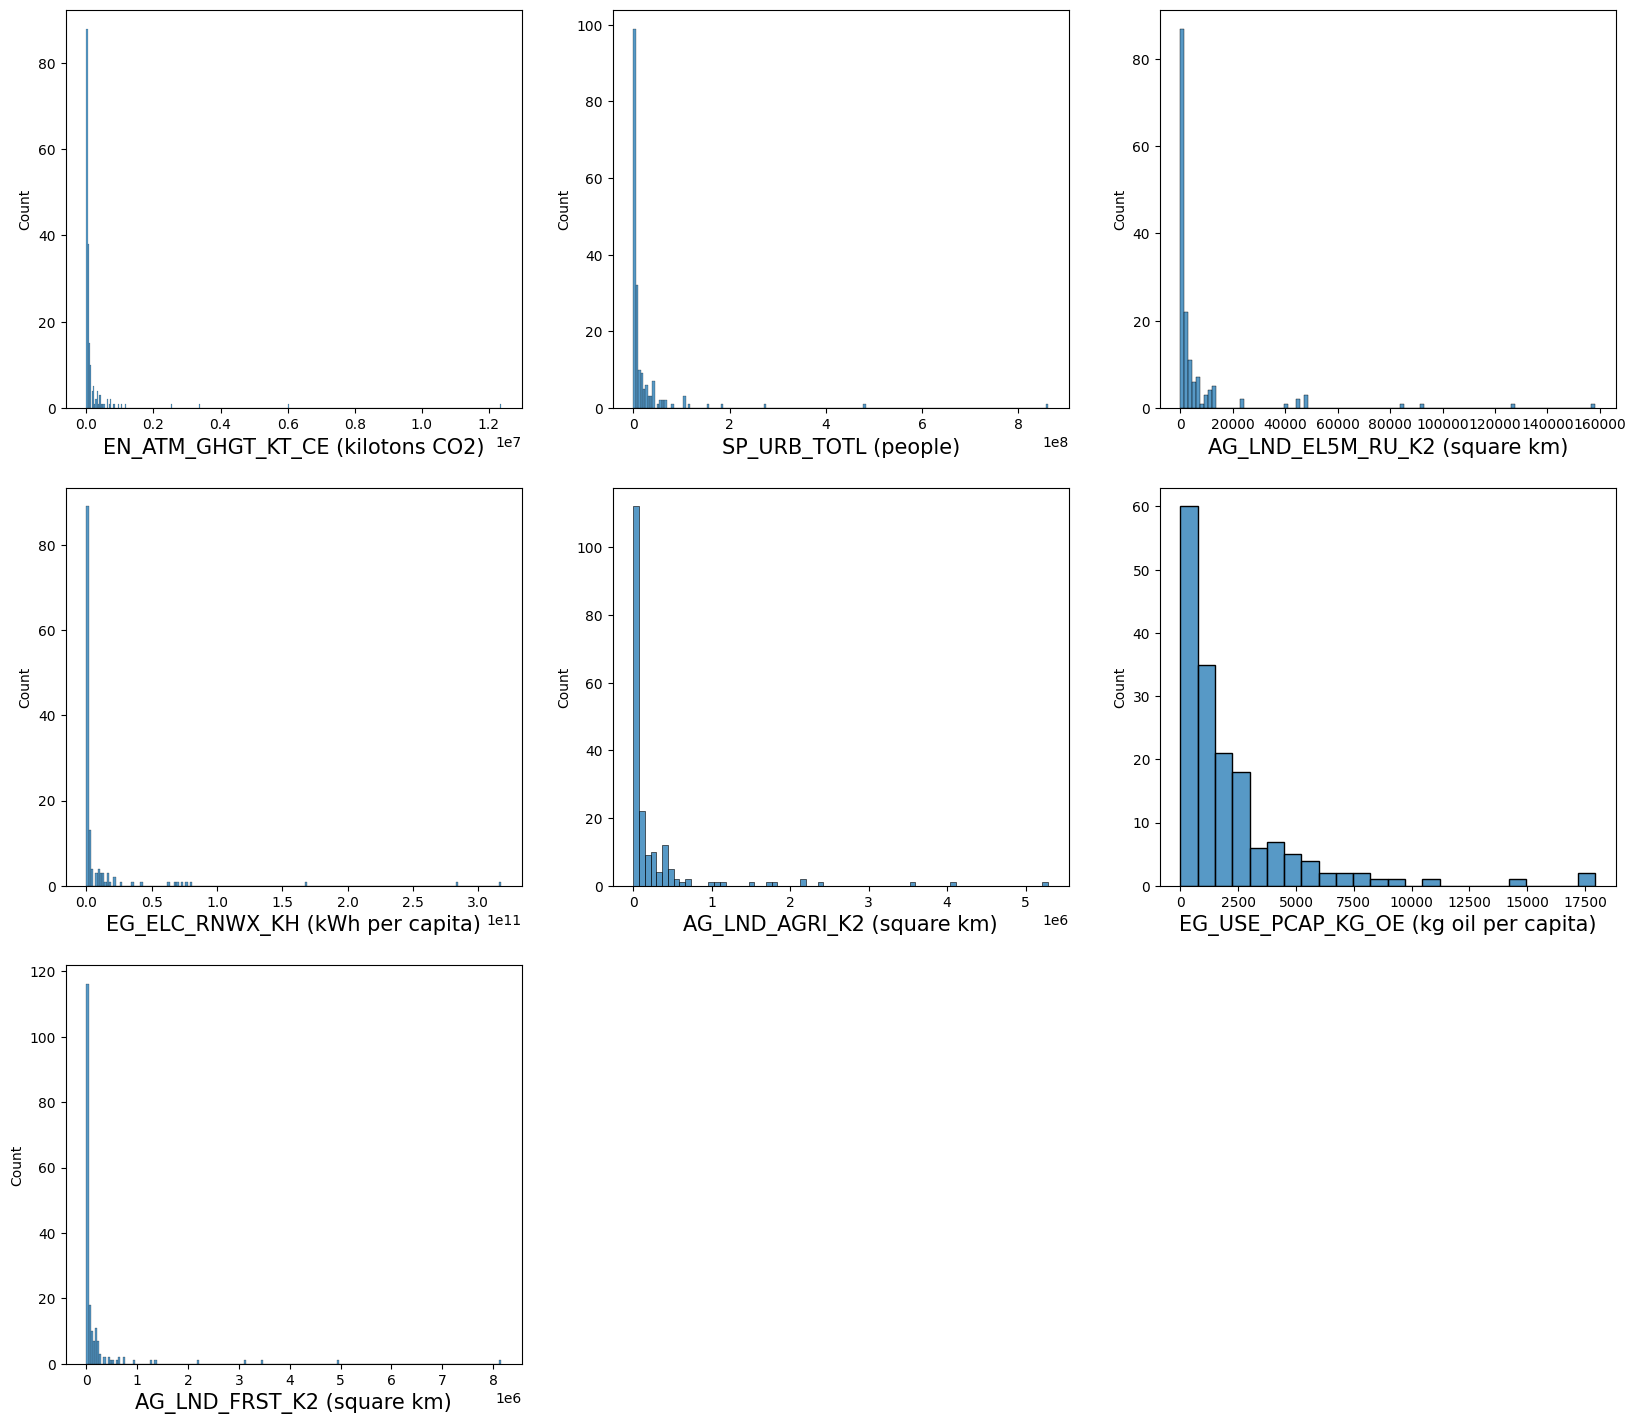

In [211]:
df_selected = df[target_categories]

# Generate histograms for each column
plt.figure(figsize = (20,30))
plot_no = 1

for column in df_selected:
    if plot_no <= 10:
        ax = plt.subplot(5, 3, plot_no)
        sns.histplot(df_selected[column])

        # Attach unit to x label
        prefix = column[-2:]
        if prefix == 'K2':
            unit_label = 'square km'
        elif prefix == 'K3':
            unit_label = 'cubic km'
        elif prefix == 'CE':
            unit_label = 'kilotons CO2'
        elif prefix == 'OE':
            unit_label = 'kg oil per capita'
        elif prefix == 'KH':
            unit_label = 'kWh per capita'
        else:
            unit_label = 'people'

        plt.xlabel(f'{column} ({unit_label})', fontsize = 15)
        
    plot_no += 1
plt.show()

Each categories' relationship with *EN.ATM.GHGT.KT.CE* can also be expressed with scatterplots with a line of best fit below. The plots are visualised by the regplot function in seaborn package to show the correlation between the predictors which are the variables placed on the x-axis and the response, *EN_ATM_GHGT_KT_CE* (in kilotons). Finally, we use the pyplot function provided in the matplotlib package to show the 5 graphs representing the relationship between the Y value and the X values.

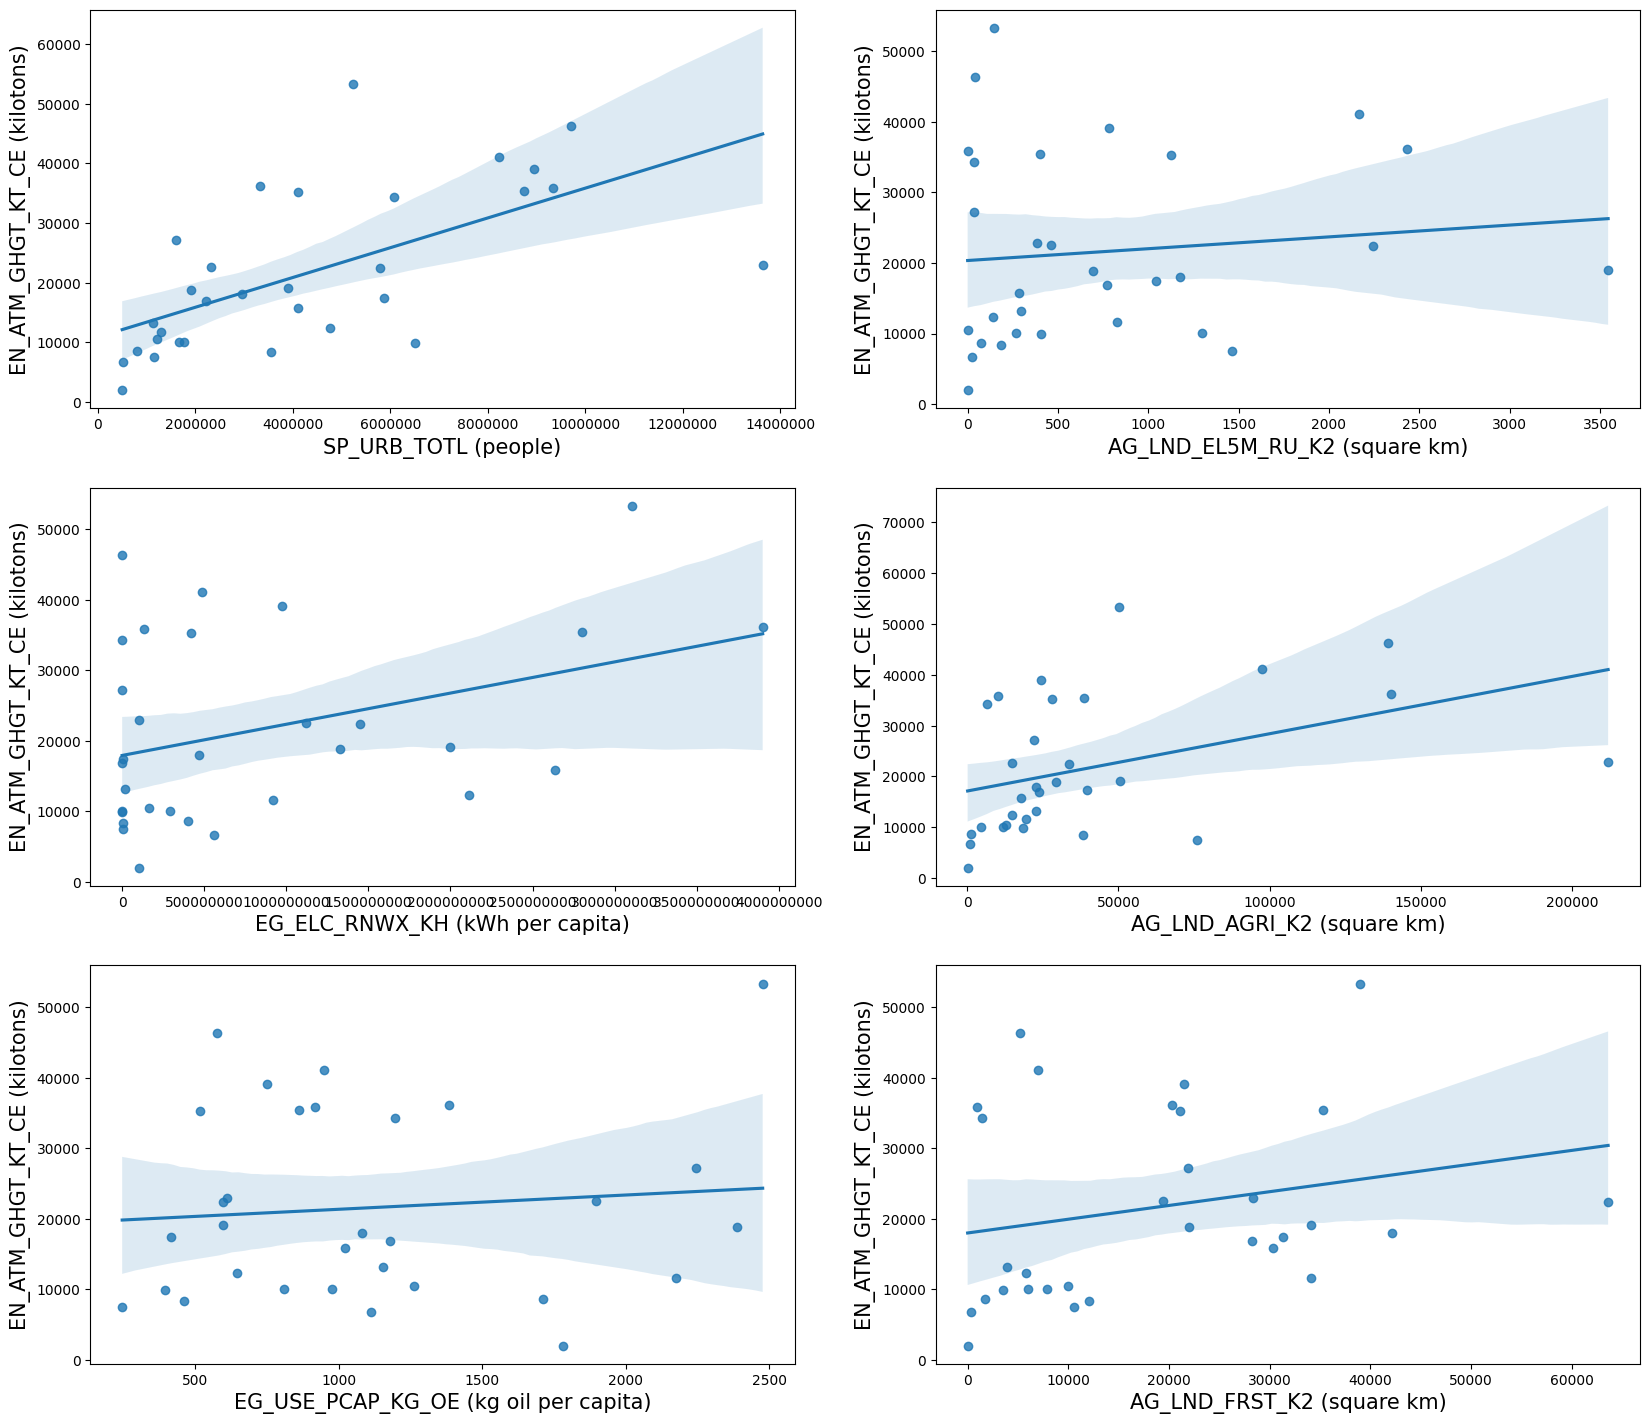

In [212]:
# Filter data to only include points below the 75% quantile of each column
df_filtered = df_selected[(df_selected < df_selected.quantile(0.75)).all(axis=1)] 

plt.figure(figsize = (20, 30))
plot_no = 1

for column in target_categories[1:]:
    if plot_no <= 10:
        ax = plt.subplot(5, 2, plot_no)
        sns.regplot(data = df_filtered, x = column, y = target_column)

        # Attach unit to x label
        prefix = column[-2:]
        if prefix == 'K2':
            unit_label = 'square km'
        elif prefix == 'K3':
            unit_label = 'cubic km'
        elif prefix == 'CE':
            unit_label = 'kilotons CO2'
        elif prefix == 'OE':
            unit_label = 'kg oil per capita'
        elif prefix == 'KH':
            unit_label = 'kWh per capita'
        else:
            unit_label = 'people'

        plt.ticklabel_format(style='plain')
        plt.xlabel(f"{column} ({unit_label})", fontsize = 15)
        plt.ylabel(f'{target_column} (kilotons)', fontsize = 15)
        
    plot_no += 1
plt.show()

Initially, the points were more concentrated around the bottom left corners of each plot, making it difficult to make out any visible linear relationship between the variables while outliers were present. Therefore, a decision was made: pruning points that lie above the 75% quantile of each column. This drastically reduced the number of points in the scope, but allowed higher accuracy during analysis. 

### Multiple Linear Regression

The Multiple Linear Regression model will be implemented by choosing some important variables which I expect could help us to predict the values of the response. The MLR will be implemented exactly similar to a simple Linear Regression model, however, the main difference is that we will include some more predictors instead of only one. The OLS Regression model will be conducted by training the ols model using the smf.ols() function and printing result.summary() to generate the desired regression results table.

To gain more insights and information about the relationship between those indicators, some of the plots for diagnostic purposes have been created. The first step to construct these plots is to create a model by using the OLS function from the statsmodel.api, then choosing the targeted predictors and provide the dataframe we want to use in this model.

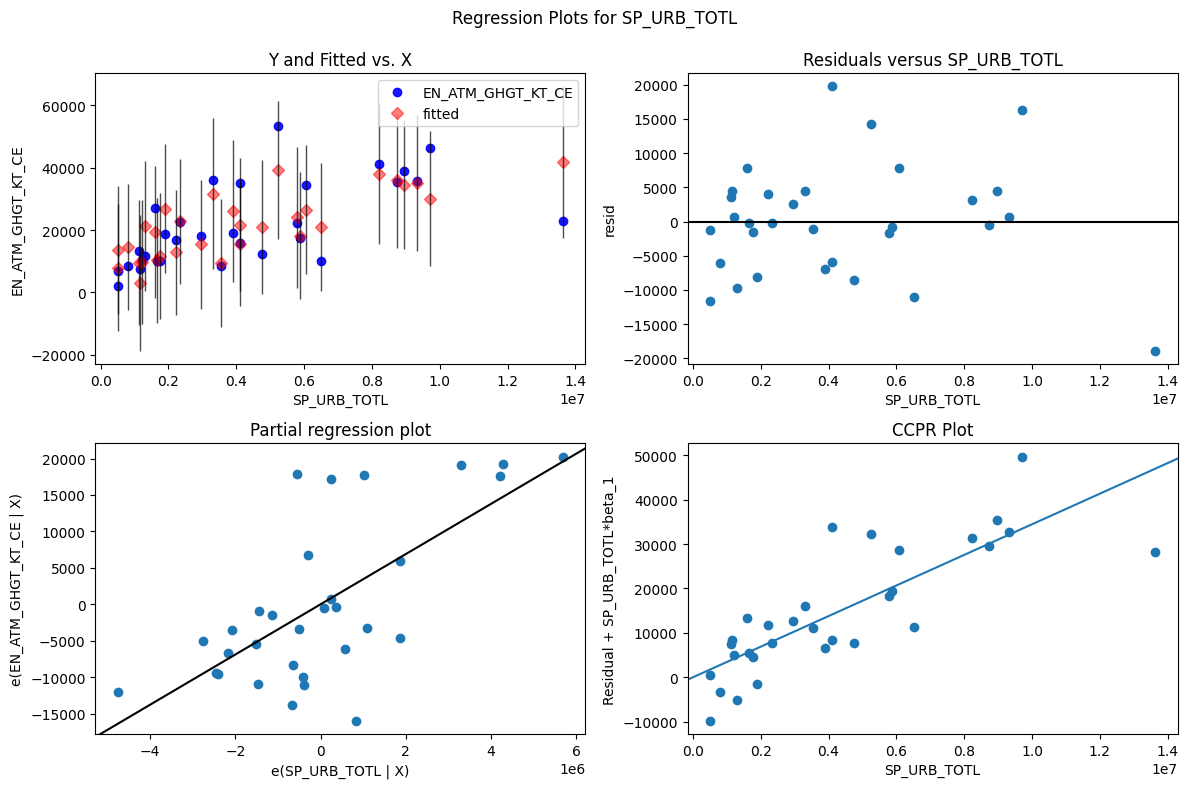

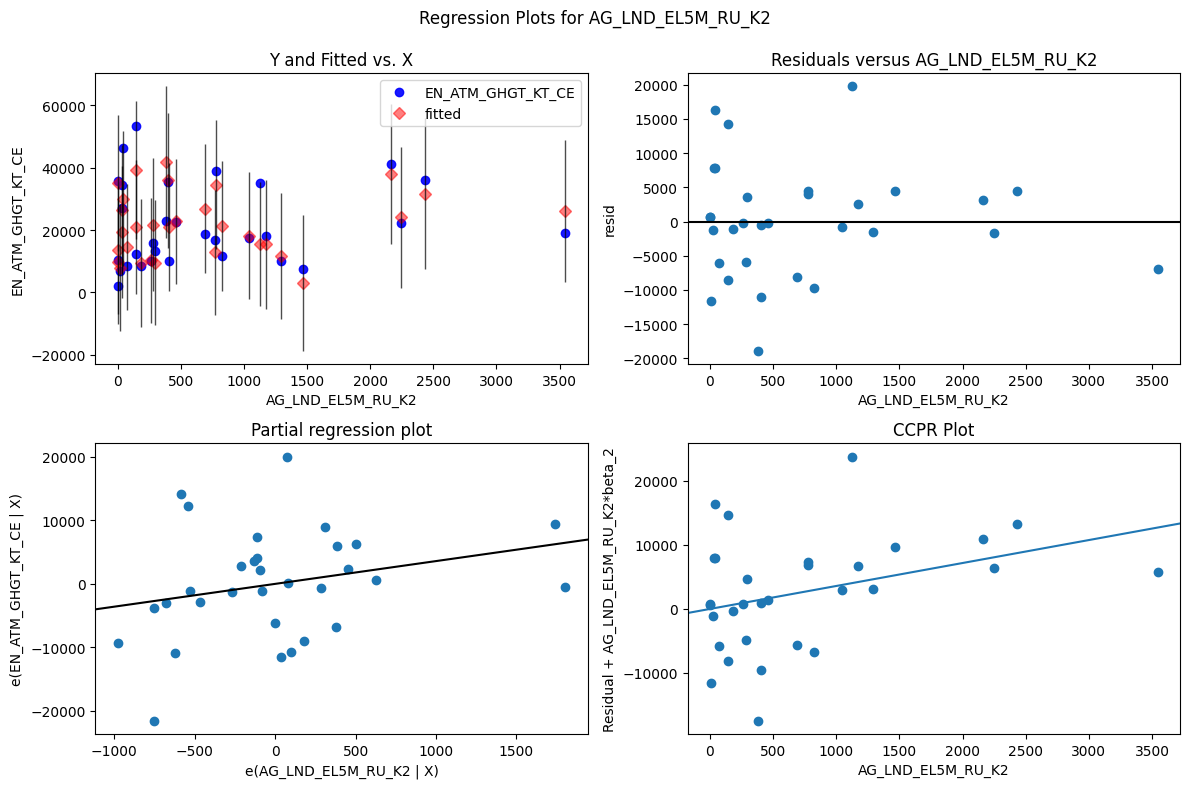

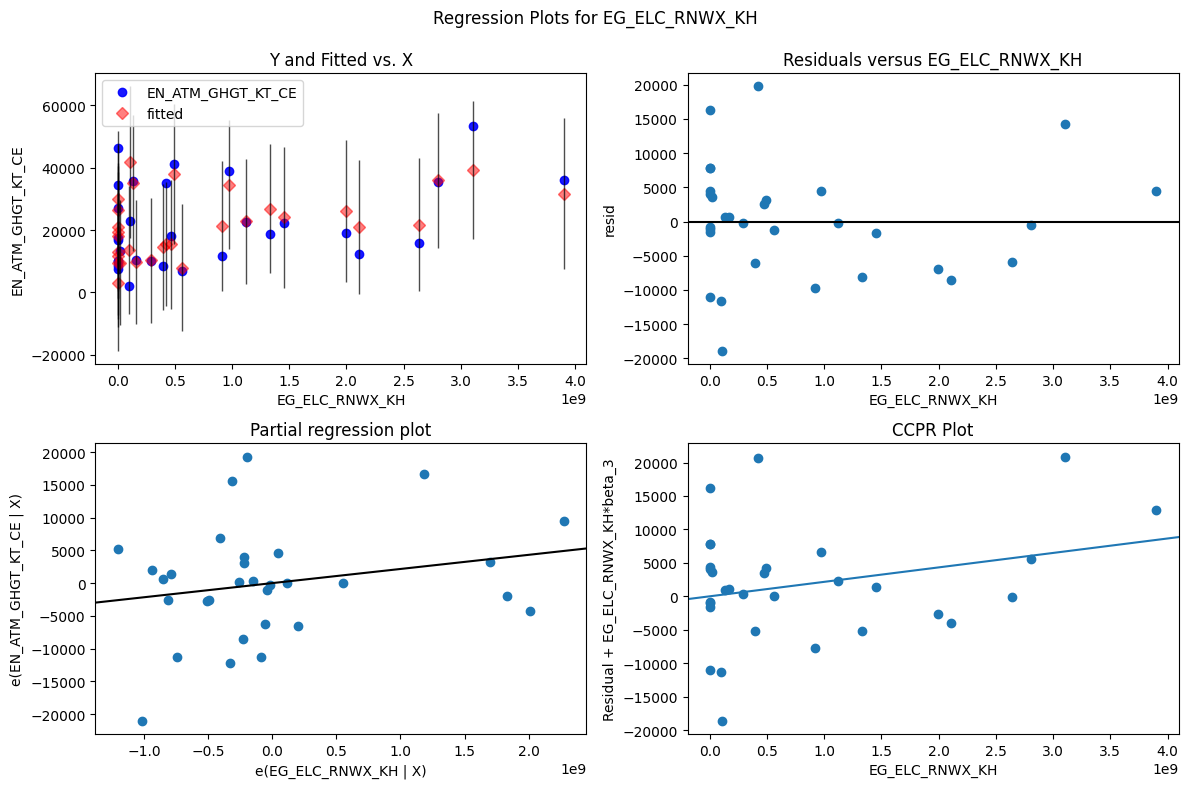

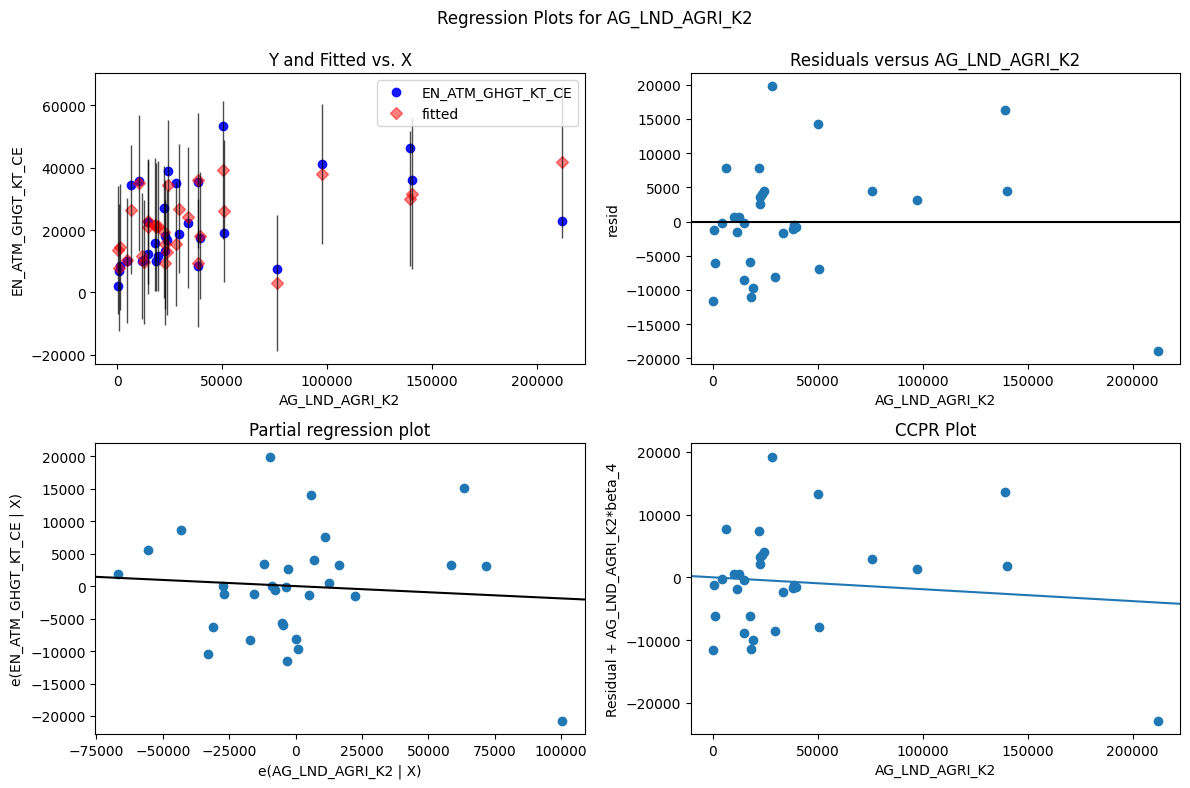

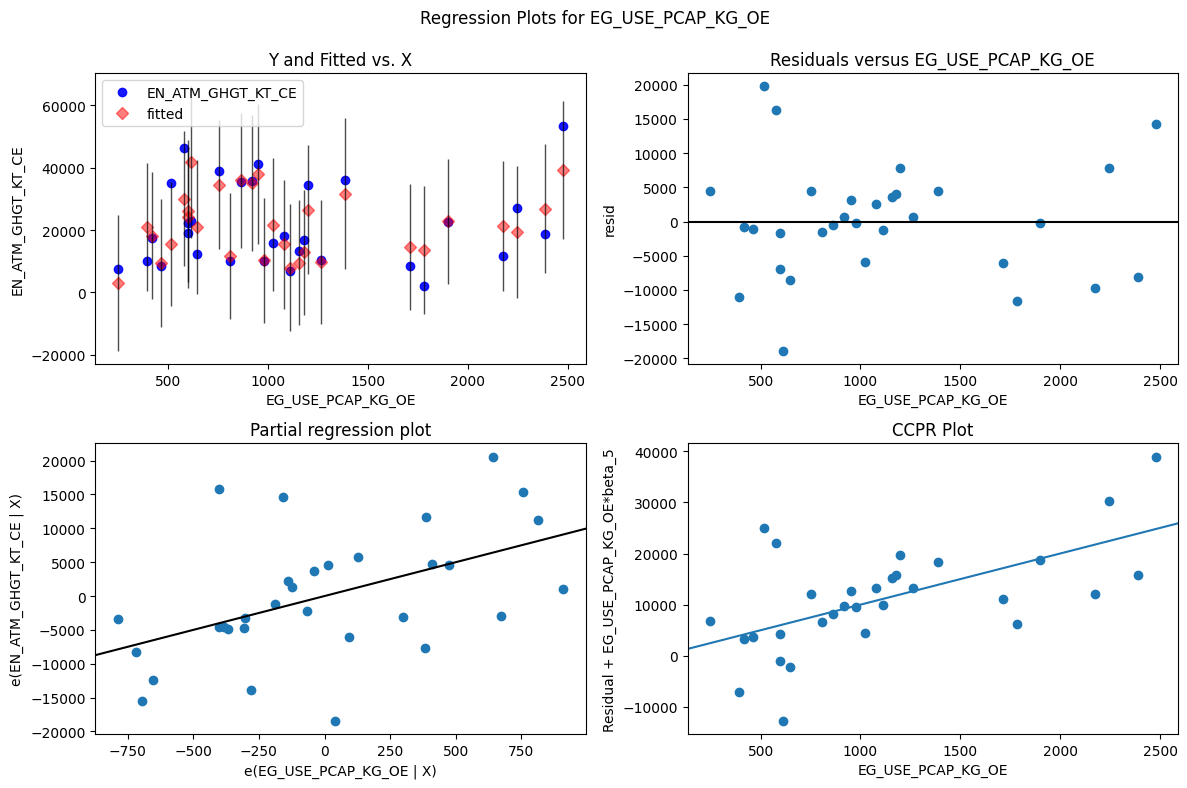

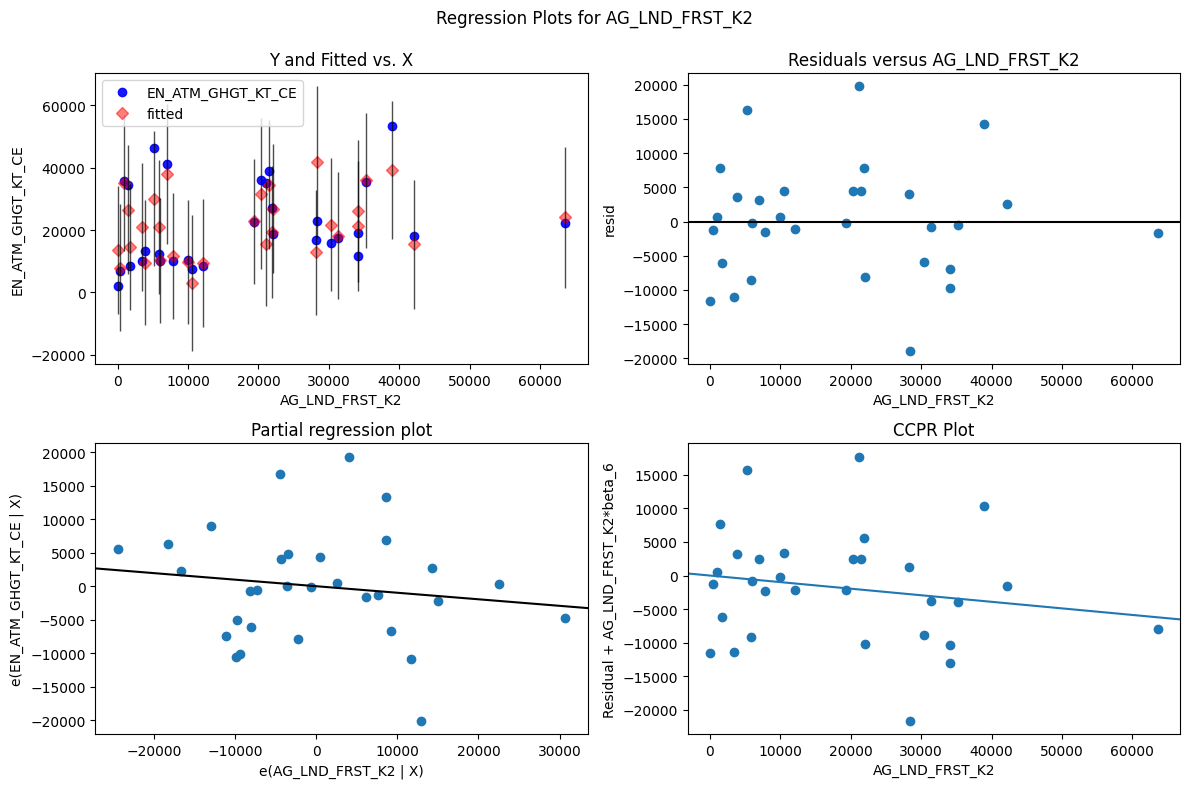

In [213]:
# Fit the model
mod = smf.ols(formula=f'{target_column} ~ {" + ".join(target_categories[1:])}', data=df_filtered)
res = mod.fit()

# Display regression plots for each predictor
for column in target_categories[1:]:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(res, column, fig=fig)
    plt.show()


In [214]:
print(res.summary(), sep="\n\n")

                            OLS Regression Results                            
Dep. Variable:      EN_ATM_GHGT_KT_CE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6.346
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000420
Time:                        18:09:20   Log-Likelihood:                -323.14
No. Observations:                  31   AIC:                             660.3
Df Residuals:                      24   BIC:                             670.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6158.4678   6097.13

### Regularisation

The Ridge Regression and the Lasso Regression are implemented by setting up the response variable and the predictors. Then, we store them into 2 arrays, one for the X values and the other for the Y values.

For Ridge Regression, the number of alpha values will be 2000 while the nlpha values for the Lasso Regression will be 20.
Here, we will use the logspace() function to produce a range of values starting from a large regularisation term to a smaller one. Then, we will store all of those values into a new list called coefs after training those values with the ridge() function. The next step is to calculate the l1norm value by adding all of the absolute value of the coefficients, and store all of those values into a list called l1norm.

The Lasso implementation will be the same except it will use the linspace() function instead of logspace() function.

In [215]:
X = df_filtered.loc[:, target_categories[1:]]
Y = df_filtered.loc[:, target_categories[0]]
X=np.array(X, dtype=np.float64)
Y=np.array(Y, dtype=np.float64)

#### The Ridge Regression

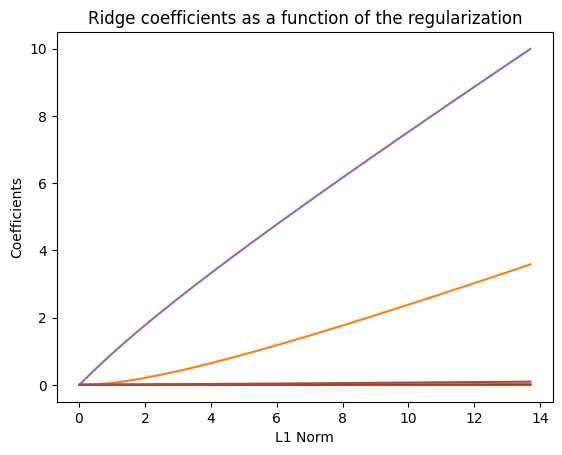

In [216]:
n_alphas = 2000
alphas = np.logspace(10, 3.5, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept = True)
    ridge.fit(X, y=Y)
    coefs.append(ridge.coef_)

l1norm=[]
length=len(coefs)
for n in range(0,length):
    l1norm.append(sum(np.abs(coefs[n])))

ax = plt.gca()

ax.plot(l1norm, np.abs(coefs))
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("L1 Norm")
plt.ylabel("Coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [217]:
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(X, Y)
ridgecv.alpha_

10000000000.0

In [218]:
ridge = linear_model.Ridge(alpha=ridgecv.alpha_, fit_intercept = True)
ridge.fit(X, y=Y)
ridge.coef_

array([ 2.39734508e-03, -1.13421613e-04,  3.90424991e-06,  1.18139142e-03,
        6.74863731e-03, -3.64547302e-03])

In [219]:
(ridgecv.alpha_/df_filtered.shape[0])*2

645161290.3225807

In [220]:
# Store the Ridge coefficients of each predictor
ridge_dict = {k: v for k, v in zip(target_categories[1:], ridge.coef_)}

#### Lasso Regression

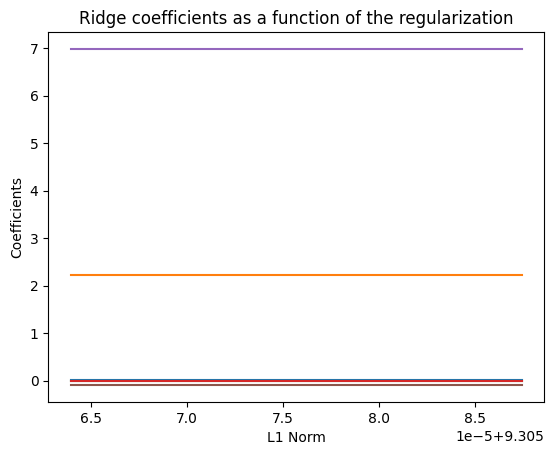

In [221]:
n_alphas = 20
alphas = np.linspace(0.0005, 6,n_alphas)
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y=Y)
    coefs.append(lasso.coef_)

l1norm=[]
length=len(coefs)
for n in range(0,length):
    l1norm.append(sum(np.abs(coefs[n])))

ax = plt.gca()

ax.plot(l1norm, coefs)
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("L1 Norm")
plt.ylabel("Coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [222]:
lassocv = LassoCV(alphas = alphas)
lassocv.fit(X, Y)
lassocv.alpha_

c:\Users\chita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28835919.056239128, tolerance: 379704.3264000001
  model = cd_fast.enet_coordinate_descent_gram(


0.0005

In [223]:
lasso = linear_model.Lasso(alpha=lassocv.alpha_, fit_intercept = True)
lasso.fit(X, y=Y)
print(lasso.coef_)

[ 3.44580962e-03  3.58570153e+00  2.16029096e-06 -1.89604511e-02
  1.00005453e+01 -9.76725475e-02]


In [224]:
# Store the Lasso coefficients of each predictor
lasso_dict = {k: v for k, v in zip(target_categories[1:], lasso.coef_)}

## Results and Discussion

By plotting all of the chosen variables with the Y variable, we could observe that not every predictor have a clear linear relationship with the response. Two of the most visbile linear relationships with the response from the MLR model are of *SP_URB_TOTL* and *EG_US_PCAP_KG_OE*. Although there are many outliers in from the plots, they suggest that we could build a model with *SP_URB_TOTL* values smaller than 3,000,000 and *AG_LND_AGRI_K2* values smaller than 40,000.

With the diagnositc plots and the OLS Regression Table, we can obtain more valuable information and assessment of this model. The Residuals vs the variable graph indicates that *EG_USE_PCAP_KG_OE* and *AG_LND_EL5M_RU_K2* both possess clear and strong linear relationships with the response, while *SP_URB_TOTL* and *EG_ELC_RNWX_KH* fall behind in predictive power. On the other hand, parameters suggest that both *AG_LND_AGRI_K2* and *AG_LND_FRST_K2* have a weak, inverted relationship with the response.

For the multiple regression conducted from those 6 predictors, we can see that the R-squared value is high, at 61.3%. In other words, there is 61.3% of the variance in the dependent variable is explained by the predictors. The p-values of the predictors are really small, most of them are smaller than 0.05 which means there might be an insightful relationship between the variables and the response. By producing this model, we can possibly generate a prediction of the EN_ATM_GHGT_KT_CE variable by the below formula:

-6158.467809 + (*SP_URB_TOTL* x 0.0034) + (*AG_LND_EL5M_RU_K2* x 3.5857) - (*AG_LND_AGRI_K2* x 0.0190) + (*EG_US_PCAP_KG_OE* x 10.0005) - (*AG_LND_FRST_K2* x 0.0977)

*(EG_ELC_RNWX_KH omitted due to neglible coefficient value)*

As for Regularisation, the Ridge Regression has shrunk the coefficients of the 6 variables toward 0, and it shows the results that *EG_ELC_RNWX_KH*'s coefficient has the most impact on the regression model, achieving the highest numerical value after regularisation. Other variables, such as, *AG_LND_AGRI_K2* or *AG_LND_FRST_K2* have shown a weak influence on the response value.

On the other hand, the Lasso Regression indicates that *EG_USE_PCAP_KG_OE* and *AG_LND_EL5M_RU_K2* are the most vital variable in this model. However, the Lasso Regression in this case has not shrunk any variable to 0, which means it has not shown any variable selection task in this particular case, and every variable’s importance is considered.


In [225]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      EN_ATM_GHGT_KT_CE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6.346
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000420
Time:                        18:09:21   Log-Likelihood:                -323.14
No. Observations:                  31   AIC:                             660.3
Df Residuals:                      24   BIC:                             670.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6158.4678   6097.139     -1.010      0.323   -1.87e+04    6425.409
SP_URB_TOTL           0.0034      0.001      4.567      0.000       0.002       0.005
AG_LND_EL5M_RU_K2     3.5857      2.680      1.338      0.194      -1.946       9.118
EG_ELC_RNWX_KH      2.16e-06   1.88e-06      1.151      0.261   -1.71e-06    6.03e-06
AG_LND_AGRI_K2       -0.0190      0.048     -0.398      0.694      -0.117       0.079
EG_USE_PCAP_KG_OE    10.0005      3.564      2.806      0.010       2.644      17.357
AG_LND_FRST_K2       -0.0977      0.137     -0.714      0.482      -0.380       0.185
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.411
Skew:                           0.227   Prob(JB):                        0.814
Kurtosis:                       3.336   Cond. No.                     4.94e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
ridge_dict

{'SP_URB_TOTL': 0.0023973450844099204,
 'AG_LND_EL5M_RU_K2': -0.00011342161335229462,
 'EG_ELC_RNWX_KH': 3.904249908873767e-06,
 'AG_LND_AGRI_K2': 0.0011813914240388936,
 'EG_USE_PCAP_KG_OE': 0.006748637305540576,
 'AG_LND_FRST_K2': -0.0036454730162687834}

In [227]:
lasso_dict

{'SP_URB_TOTL': 0.0034458096235575604,
 'AG_LND_EL5M_RU_K2': 3.5857015327479624,
 'EG_ELC_RNWX_KH': 2.1602909617459226e-06,
 'AG_LND_AGRI_K2': -0.018960451135553023,
 'EG_USE_PCAP_KG_OE': 10.000545280114594,
 'AG_LND_FRST_K2': -0.09767254748629879}

## Conclusions

After investigating each of the 6 notable indicators' relationships with our target variable, I have come to the conclusion that population growth and energy use per capita are most responsible for the increasing amounts of greenhouse gas emissions worldwide. One other interesting discovery I have found is that countries and terrorities with more rural land under 5 meters below sea level are likely to have higher GHG emissions. In restrospect, I have likely missed out on other categories with higher predicting power due to my preference of correlation with the response variable, and other statistical models might have worked better for my choice of input variables.